In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Connect to the database
con = sqlite3.connect('resources/heart.sqlite') 

# Run SQL on table         
sql_query = pd.read_sql('SELECT * FROM original', con)

# Display query results
sql_query.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Convert SQL to Pandas DataFrame
df = pd.DataFrame(sql_query, columns = ['Age',
                                        'Sex',
                                        'ChestPainType',
                                        'RestingBP',
                                        'Cholesterol',
                                        'FastingBS',
                                        'RestingECG',
                                        'MaxHR',
                                        'ExerciseAngina',
                                        'Oldpeak',
                                        'ST_Slope',
                                        'HeartDisease']
                 )

# Preview newly created DF
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Check for values of zero in features that are int or float, as these may be spurious
age_zero = (df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS',	'MaxHR', 'Oldpeak']] == 0).sum()
print(age_zero)

Age              0
RestingBP        1
Cholesterol    172
FastingBS      704
MaxHR            0
Oldpeak        368
dtype: int64


In [5]:
#Removing all rows that have 0 for cholesterol
df_no_zeros = df[df["Cholesterol"] != 0]  
#Removing the row that has 0 for RestingBP
df_no_zeros = df_no_zeros[df_no_zeros["RestingBP"] != 0]

In [6]:
#Check for values of zero again to see if our process worked
age_zero = (df_no_zeros[['Age', 'RestingBP', 'Cholesterol', 'FastingBS',	'MaxHR', 'Oldpeak']] == 0).sum()
print(age_zero)
#Our removal has been successful

Age              0
RestingBP        0
Cholesterol      0
FastingBS      621
MaxHR            0
Oldpeak        317
dtype: int64


In [7]:
#Writing new dataframe as output to the resources folder
df_no_zeros.to_csv("resources/heart_no_zeros.csv", index=False)

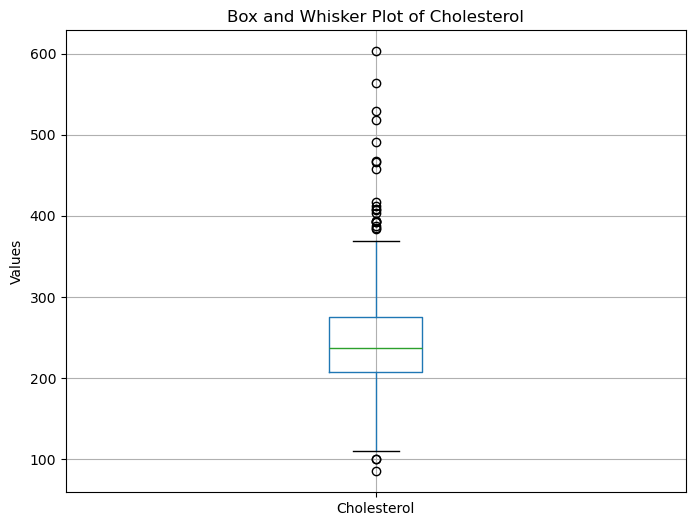

In [8]:
#Now, we are investigating the cholesterol column to see what the data looks like, and to see what kind of value we should use to replace the zeros

# Create a box plot of the rest of the cholesterol values
plt.figure(figsize=(8, 6))
df_no_zeros.boxplot(column='Cholesterol')
plt.title('Box and Whisker Plot of Cholesterol')
plt.ylabel('Values')
plt.savefig("resources/images/box_whisker_cholesterol.png")
plt.show()

#### The boxplot and histogram suggest there are several outliers at the high values that skew the distribution.
#### Median would be a better representation of the central tendancy of the distribution.

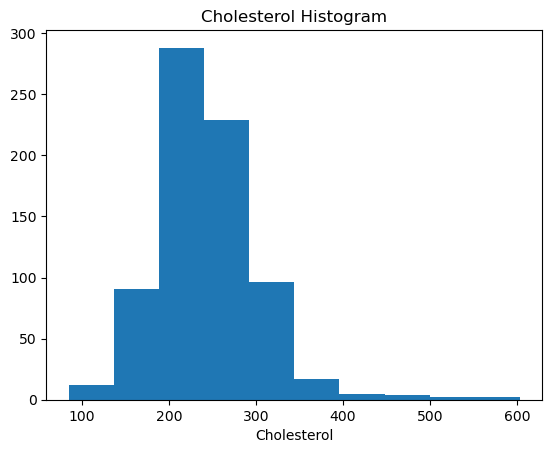

In [9]:
#Create a histogram of the cholesterol variable
plt.hist(df_no_zeros["Cholesterol"])
plt.title('Cholesterol Histogram')
plt.xlabel('Cholesterol')
plt.savefig("resources/images/hist_cholesterol.png")
plt.show()

In [10]:
#Identifiy the median value, will be used to replace zeros
Ch_replacement = df_no_zeros["Cholesterol"].median()
df_no_zeros["Cholesterol"].median()

237.0

In [11]:
#Here's the mean for comparison
df_no_zeros["Cholesterol"].mean()

244.6353887399464

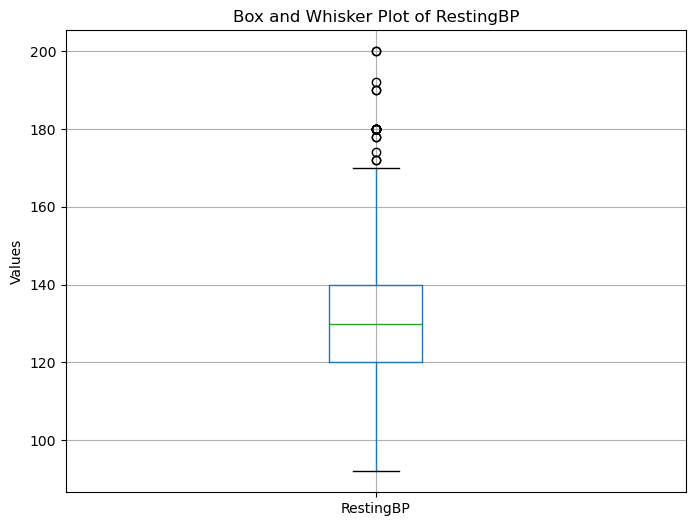

In [12]:
# Now, we are investigating the RestingBP column to see what the data looks like
# and to see what kind of value we should use to replace the zeros

# Create a box plot of the rest of the resingBP values
plt.figure(figsize=(8, 6))
df_no_zeros.boxplot(column='RestingBP')
plt.title('Box and Whisker Plot of RestingBP')
plt.ylabel('Values')
plt.savefig("resources/images/box_whisker_RestingBP.png")
plt.show()

#### The boxplot and histogram suggest there are several outliers at the high values that skew the distribution.
#### Not as strong as cholesterol, but similar.
#### Median would be a better representation of the central tendancy of the distribution.

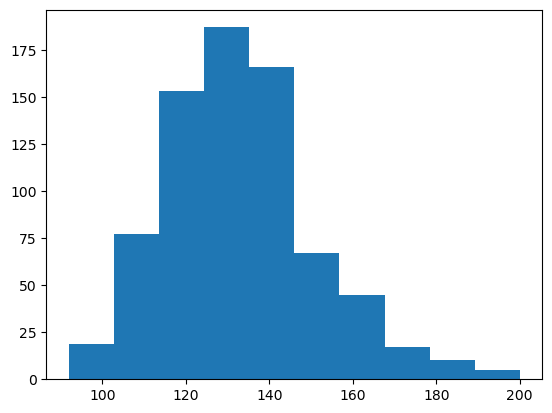

In [13]:
#Create a histogram of the RestingBP variable
plt.hist(df_no_zeros["RestingBP"])
plt.title('RestingBP Histogram')
plt.xlabel('RestingBP')
plt.savefig("resources/images/hist_RestingBP.png")
plt.show()

In [14]:
#Identifiy the median value, will be used to replace zeros
BP_replacement = df_no_zeros["RestingBP"].median()
df_no_zeros["RestingBP"].median()

130.0

In [15]:
#Here is the mean for comparison
df_no_zeros["RestingBP"].mean()

133.02278820375335

In [16]:
#Create a copy of the original dataframe and replace the zeros with the medians
cleaned_df = df.copy()
cleaned_df['Cholesterol'] = cleaned_df['Cholesterol'].replace(0, Ch_replacement)
cleaned_df['RestingBP'] = cleaned_df['RestingBP'].replace(0, BP_replacement)

In [17]:
#Export the new csv
cleaned_df.to_csv("resources/heart_replaced_values.csv", index=False)

In [18]:
#Check to make sure we don't have any undesirable zeros in the dataset again
age_zero = (cleaned_df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS',	'MaxHR', 'Oldpeak']] == 0).sum()
print(age_zero)

Age              0
RestingBP        0
Cholesterol      0
FastingBS      704
MaxHR            0
Oldpeak        368
dtype: int64


In [19]:
#Verify we didn't add or remove any rows
len(cleaned_df)

918

In [20]:
#This one with no zeros should be shorter
len(df_no_zeros)

746

In [21]:
#Should be same length as replaced_values
len(df)

918

In [22]:
#We want to know how many patients in the dataset have heart disease, it's over half the datset
Heart_disease = (df[['HeartDisease']] == 1).sum()
print(Heart_disease)

HeartDisease    508
dtype: int64


In [23]:
#We want to know how many of the zero cholesterol values have heart disease, its 152/172, a very large proportion
print(((df['HeartDisease'] == 1) & (df["Cholesterol"] == 0)).sum())

print("This suggests maybe using the median of the entire dataset is not sound if most of the patients here have heart disease.")
print("Not the same proportion as the original dataset.")

152
This suggests maybe using the median of the entire dataset is not sound if most of the patients here have heart disease.
Not the same proportion as the original dataset.


In [24]:
percent_w_hd_no_cholesterol = 152/508
print("The percentage of patients with heart disease who were missing cholesterol values")
print(format(percent_w_hd_no_cholesterol,'.2%'))

The percentage of patients with heart disease who were missing cholesterol values
29.92%


In [25]:
missing_cholesterol_w_hd = 152/172
print("The percentage of patients missing cholesterol values who had heart disease")
print(format(missing_cholesterol_w_hd,'.2%'))

The percentage of patients missing cholesterol values who had heart disease
88.37%


In [26]:
#Attempting to cluster the data by Kmeans and using the mean/median value of each cluster to replace cholesterol values

#K-means Approach
from sklearn.cluster import KMeans
import hvplot.pandas
from sklearn.metrics import calinski_harabasz_score

In [27]:
#Create initial lists for elbow method and calinski-harabasz scores to determine optimal number of clusters
inertia = []
calinski_harabasz_scores = []
c_h_list = []
k = list(range(1, 22))

In [28]:
#Create a temporary dataframe with one-hot encoding for all variables
temp_df = pd.get_dummies(df)

#Drop cholesterol column so the zeros don't affect the clustering
temp_df_dropped = temp_df.drop("Cholesterol", axis = 1)
temp_df_dropped

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,0,172,0.0,0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,0,156,1.0,1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,0,98,0.0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,0,108,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,0,122,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,0,132,1.2,1,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,68,144,1,141,3.4,1,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,57,130,0,115,1.2,1,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,57,130,0,174,0.0,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [29]:
#Loop through 2 through 21 clusters and calculate inertia and calinski_harabasz scores to find optimal number of clusters

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(temp_df_dropped)
    inertia.append(k_model.inertia_)
    if (i != 1):
        score = calinski_harabasz_score(temp_df_dropped, k_model.labels_)
        c_h_list.append(i)
        calinski_harabasz_scores.append(score)

C:\Users\Jack Runge\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack Runge\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Jack Runge\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack Runge\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

2 appears to be optimal number of clusters.


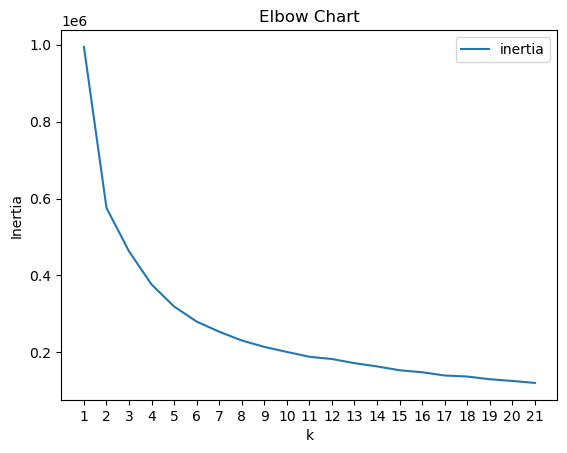

:Curve   [k]   (inertia)

In [30]:
#Create a dataframe of the inertia data and plot it to find optimal number of clusters

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

print("2 appears to be optimal number of clusters.")

# Line plot
df_elbow.plot(x="k", y="inertia", kind='line')
plt.title('Elbow Chart')
plt.xlabel('k')
plt.ylabel("Inertia")
plt.xticks(k)
plt.savefig("resources/images/elbow_chart.png")
plt.show()

df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

Two clusters(k=2) has the highest value, so two clusters appears to be optimal:
[665.9097252772506, 525.3822555139764, 499.7921051437041, 482.246744370047, 464.77411118437357, 442.71254000032644, 429.36854941724545, 413.137610593199, 397.23438589903213, 387.2005023662488, 365.2719927907526, 360.1189221418573, 352.9425344815993, 352.81695856975097, 342.3439462932951, 343.28367932874283, 330.28791463979655, 330.87832562371375, 325.9577097020844, 324.37917468108367]


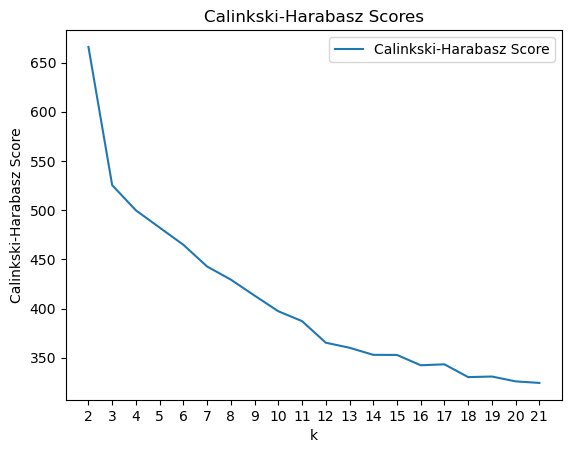

In [31]:
#Check calinski-harabasz scores
print("Two clusters(k=2) has the highest value, so two clusters appears to be optimal:")
print(calinski_harabasz_scores)

calinski_data = {"k": c_h_list, "Calinkski-Harabasz Score" : calinski_harabasz_scores}
df_c_h = pd.DataFrame(calinski_data)

df_c_h.plot(x="k", y="Calinkski-Harabasz Score", kind='line')
plt.title('Calinkski-Harabasz Scores')
plt.xlabel('k')
plt.ylabel("Calinkski-Harabasz Score")
plt.xticks(list(range(2,22)))
plt.savefig("resources/images/Calinkski-Harabasz.png")
plt.show()

In [32]:
#Create a kmeans model with two clusters
model = KMeans(n_clusters = 2)
model.fit(temp_df_dropped)

#Use the model to seperate the data into clusters 
predictions = model.predict(temp_df_dropped)

#Copy the original data and add the clusters as a column
df_with_pred = df.copy()
df_with_pred['cluster'] = predictions
df_with_pred

C:\Users\Jack Runge\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack Runge\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cluster
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0


In [33]:
# Plot the clusters to visualize
df_with_pred.hvplot.scatter(
    x="MaxHR",
    y="Age",
    by="cluster"
)

:NdOverlay   [cluster]
   :Scatter   [MaxHR]   (Age)

In [34]:
#Remove the zeros from the dataframe with the clusters
df_with_pred_no_zeros = df_with_pred[df_with_pred["Cholesterol"] != 0]    

In [35]:
#Find the mean and median of the cholesterol values left for each cluster
grouped = df_with_pred_no_zeros.groupby('cluster')['Cholesterol'].agg(['mean', 'median'])
print(grouped)
print("")
print("The median for each cluster is the same for the whole dataset. For now, this clustering approach seems to be an")
print("ineffective way to find more accurate values for the zeros found in the cholesterol column.")

               mean  median
cluster                    
0        242.974239   237.0
1        246.858934   237.0

The median for each cluster is the same for the whole dataset. For now, this clustering approach seems to be an
ineffective way to find more accurate values for the zeros found in the cholesterol column.
